In [ ]:
import pandas as pn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

model seçme algoritması


In [ ]:
def regresions(dataset,y):
    LR=LinearRegression()
    Las=Lasso()
    R=Ridge()
    ETR=ExtraTreeRegressor()
    GBR=GradientBoostingRegressor()
    KNR=KNeighborsRegressor()
    x=dataset.drop([y],axis=1)
    y=dataset[y]
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=13)

    regs=[LR,Las,R,ETR,KNR,GBR]
    regs_name=["Linear","Lasso","Ridge","ExtraTree",'KNeighbour','Gradient']

    r2=[]
    mean_s=[]
    mean_a=[]
    for reg in regs:
        model=reg.fit(x_train,y_train)
        y_pred=model.predict(x_test)
        mean_s.append(mean_squared_error(y_test,y_pred)**0.5)
        r2.append(r2_score(y_test,y_pred))
        mean_a.append(mean_absolute_error(y_test,y_pred))
        
    veri={"mean_absolute_error":mean_a,"mean_squared_error":mean_s,"r2_score":r2}
    veri2={'GerçekVeri':y_test,'TahminVeri':y_pred}
    df2=pn.DataFrame(veri2)
    df=pn.DataFrame(veri,index=regs_name)
    return df,df2,model

In [ ]:
veri=pn.read_csv('advertising.csv')

#  EDA

In [ ]:
veri.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
veri.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
veri.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [ ]:
veri.corr()['Sales'].sort_values(ascending=False)

Sales        1.000000
TV           0.782224
Radio        0.576223
Newspaper    0.228299
Name: Sales, dtype: float64

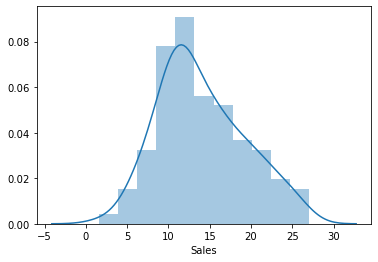

In [ ]:
sbn.distplot(veri['Sales'])

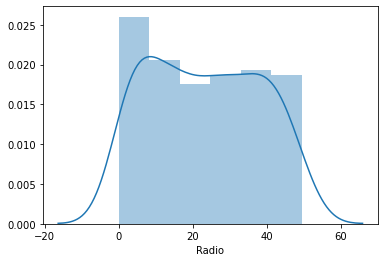

In [ ]:
sbn.distplot(veri['Radio'])

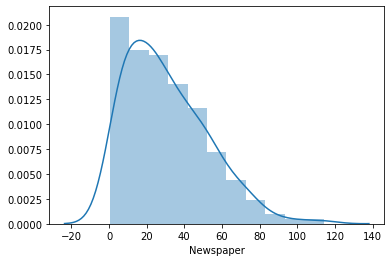

In [ ]:
sbn.distplot(veri['Newspaper'])

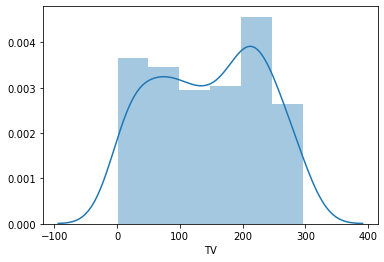

In [ ]:
sbn.distplot(veri['TV'])

In [ ]:
veri1,veri2,model=regresions(veri,'Sales')

In [ ]:
veri2.head()

,GerçekVeri,TahminVeri
179,12.6,13.263639
155,3.2,4.676249
23,15.5,15.523431
159,12.9,12.893008
96,11.7,11.415367


In [ ]:
veri2.tail()

,GerçekVeri,TahminVeri
13,9.7,10.583348
90,11.2,10.580503
15,22.4,22.311179
195,7.6,7.908977
94,11.5,12.013490


In [ ]:
veri1.sort_values('r2_score')
# buradan aldığım bilgiyle en ii score u veren Gradient i fonksiyondaki for döngüsünde sona attım ve o modeli kullandım

,mean_absolute_error,mean_squared_error,r2_score
KNeighbour,1.192500,1.698561,0.904469
Lasso,1.182754,1.453710,0.930026
Ridge,1.180097,1.445044,0.930858
Linear,1.180093,1.445033,0.930859
ExtraTree,0.847500,1.170790,0.954612
Gradient,0.611297,0.782043,0.979749


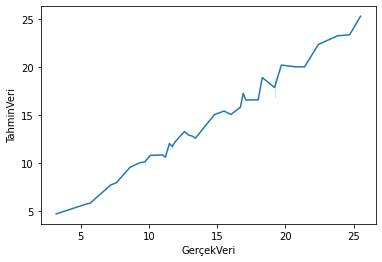

In [ ]:
sbn.lineplot(veri2.GerçekVeri,veri2.TahminVeri)

In [ ]:
#deneme yanılma ile hangisinin daha iyi olduğunu bulacağım
# ilk adım TV =10000, newspaper=0, radio=0
# ikinci adım TV =0, newspaper=1000000, radio=0
# üçüncü adım TV =0, newspaper=0, radio=1000000

In [ ]:
test1={"TV":[100,0,0],"Radio":[0,100,0],"Newspaper":[0,0,100]}
df_test=pn.DataFrame(test1)
df_test

,TV,Radio,Newspaper
0,100,0,0
1,0,100,0
2,0,0,100


In [ ]:
y_pred_test= model.predict(df_test)
y_pred_test

array([9.10388675, 2.84320255, 2.89873316])

In [ ]:
y_pred_tablo={"TV":[y_pred_test[0]],'Radio':[y_pred_test[1]],'Newspaper':[y_pred_test[2]]}
Avantage=pn.DataFrame(y_pred_tablo,index=['Sales'])
Avantage

,TV,Radio,Newspaper
Sales,9.103887,2.843203,2.898733


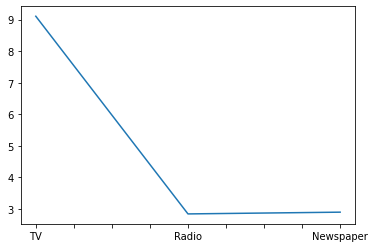

In [ ]:
Avantage.iloc[0].plot()

In [ ]:
# görülen o ki en avantajlı reklam TV de 

In [ ]:
max(Avantage)

'TV'